<a href="https://colab.research.google.com/github/HenryLiu714/ct_classification/blob/main/PrototypeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
import pickle

Mounted at /content/drive


In [ ]:
X = pickle.load(open("/content/drive/My Drive/Stem Proyectp/Project/DataStorage/X.pickle","rb"))
y = pickle.load(open("/content/drive/My Drive/Stem Proyectp/Project/DataStorage/y.pickle","rb"))

In [ ]:
X=X/255.0
y = np.array(y)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 2)

In [ ]:
class EditModel:
  def layer1(model):
    model.add(Conv2D(64, (3,3), input_shape = X.shape[1:])) # 32 filter start
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

  def layer2(model):
    model.add(Conv2D(64, (10,10))) # As opposed to 3 x 3
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

  def layer3(model):
    model.add(Flatten())
    model.add(Dense(64))

  def layer4(model):
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

  def layer5(model):
    model.add(Conv2D(96, (10,10))) #96 filter end
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

  def layer6(model):
    model.add(Conv2D(64, (5,5))) # As opposed to 3 x 3
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model = Sequential()

EditModel.layer1(model)
EditModel.layer2(model) # Removed a layer2
EditModel.layer6(model)
EditModel.layer5(model)
EditModel.layer3(model)
EditModel.layer4(model)

In [ ]:
model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])

In [ ]:
training = model.fit(X_train, y_train, batch_size = 15, epochs = 10, validation_data=(X_valid, y_valid))

Epoch 1/10
134/134 [==============================] - 75s 415ms/step - loss: 0.8647 - accuracy: 0.6035 - val_loss: 0.6199 - val_accuracy: 0.6693
Epoch 2/10
134/134 [==============================] - 47s 349ms/step - loss: 0.6172 - accuracy: 0.6710 - val_loss: 0.5840 - val_accuracy: 0.6853
Epoch 3/10
134/134 [==============================] - 47s 348ms/step - loss: 0.4956 - accuracy: 0.7645 - val_loss: 0.4154 - val_accuracy: 0.7968
Epoch 4/10
134/134 [==============================] - 47s 349ms/step - loss: 0.3707 - accuracy: 0.8415 - val_loss: 0.3537 - val_accuracy: 0.8367
Epoch 5/10
134/134 [==============================] - 47s 348ms/step - loss: 0.2841 - accuracy: 0.8820 - val_loss: 0.3402 - val_accuracy: 0.8327
Epoch 6/10
134/134 [==============================] - 47s 348ms/step - loss: 0.1846 - accuracy: 0.9310 - val_loss: 0.2863 - val_accuracy: 0.8606
Epoch 7/10
134/134 [==============================] - 47s 348ms/step - loss: 0.1968 - accuracy: 0.9240 - val_loss: 0.2222 - val_ac

In [ ]:
model.save("/content/drive/My Drive/Stem Proyectp/Project/Models/model_1_v5")

INFO:tensorflow:Assets written to: /content/drive/My Drive/Stem Proyectp/Project/Models/model_1_v5/assets


In [ ]:
model_1_v5 = keras.models.load_model("/content/drive/My Drive/Stem Proyectp/Project/Models/model_1_v5")

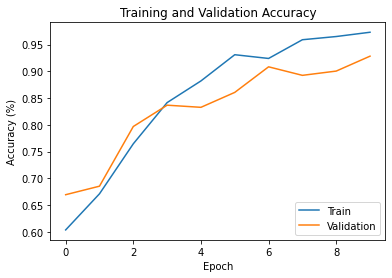

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'], loc = 'lower right')
plt.show()

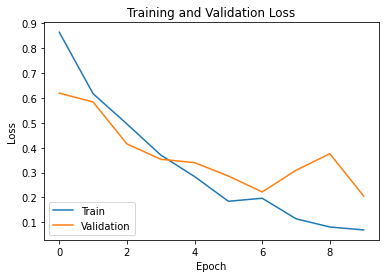

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc = 'lower left')
plt.show()

In [ ]:
model_1_v5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 64)      640       
                                                                 
 activation (Activation)     (None, 398, 398, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 190, 190, 64)      409664    
                                                                 
 activation_1 (Activation)   (None, 190, 190, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 95, 95, 64)       0         
 2D)                                                    

In [ ]:
model_1_v5.evaluate(X_test, y_test)

8/8 [==============================] - 26s 2s/step - loss: 0.1696 - accuracy: 0.9520


[0.1696060597896576, 0.9520000219345093]